In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.18.0-dev20240614


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kelvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('E:/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [5]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

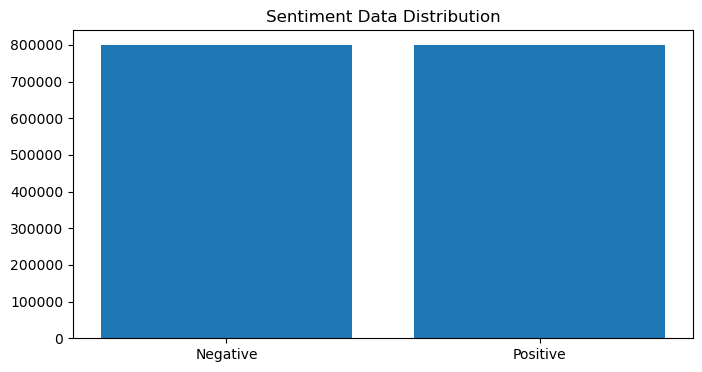

In [6]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [7]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
240239,Negative,is poor. Seriously seriously.
438457,Negative,"Craving a cheeseburger, but can't have one sin..."
1015463,Positive,"@jimmietryon never liked the option, windows i..."
1145870,Positive,@h0ney_ Lmao Hey I think I saw your twitter o...
870190,Positive,http://twitpic.com/4efrg - I'll be your baby-s...
972881,Positive,mhh some quality jog time with me and my puppy...
928580,Positive,Kittyspam! Adorable feline photos or horrible ...
1093909,Positive,"@asdotnet Thanks, but it is a legal drama - so..."
31274,Negative,9 minutes in and i already hate school and tea...
1019738,Positive,@HazalSelena yes O_o HAHA I hope you'll like ...


In [8]:
stemmer = SnowballStemmer('english')

def decontracted(phrase):
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Kelvin\AppData\Local\Temp\ipykernel_8788\2477235340.py:13: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [9]:
def preprocess(text, stem=False):
  text = decontracted(text)
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if stem:
      tokens.append(stemmer.stem(token))
    else:
      tokens.append(token)
  return " ".join(tokens)

In [10]:
df.text = df.text.apply(lambda x: preprocess(x))

In [11]:
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[884061,:].head(10) # Returns the rows with the index and display it

sentiment                  Positive
text         i know is not that sad
Name: 884061, dtype: object

# Split & Train

In [12]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [13]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [14]:
train_data.head(10)

,sentiment,text
23786,Negative,i need friends
182699,Negative,im trying to call but is impossible
476661,Negative,had a good pace going 3k after 13 min but i mi...
1181490,Positive,are u gonna be doing any shows in ny soon i ha...
878773,Positive,hell yea get em into tattoos so they can ink y...
130866,Negative,yeah where but i need 2 see if ur mom calls ba...
1235876,Positive,sounds like my cup of tea where do we sign up
717314,Negative,i am tired but i do not want to sleep wtf
969880,Positive,amazing i wish i was there too
748698,Negative,thank god wkrn abc affiliate for nashville is ...


In [15]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 291355


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [17]:
labels = train_data.sentiment.unique().tolist()

In [18]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [19]:
import pickle
sentiment_model = pickle.load(open("E:/Research ML/CNN_SentimentAnalysis.pkl", 'rb'))
sarcasm_model = pickle.load(open("E:/Research ML/CNN_SarcasmDetection.pkl", 'rb'))

In [20]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

scores = sentiment_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step


In [21]:
from sklearn.metrics import classification_report
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.83      0.78      0.80    160542
    Positive       0.79      0.84      0.81    159458

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



In [22]:
sarcasm_scores = sarcasm_model.predict(x_test, verbose=1, batch_size=1000)
after_pred_1d = []

320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [23]:
for idx, score in enumerate(scores):
    sentiment = ""
    if score>0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    if sarcasm_scores[idx][0]>0.5 and sentiment == "Positive":
        sentiment = "Negative"
    elif sarcasm_scores[idx][0]>0.5 and sentiment == "Negative":
        sentiment = "Positive"

    after_pred_1d.append(sentiment)

In [24]:
print(classification_report(list(test_data.sentiment), after_pred_1d))

              precision    recall  f1-score   support

    Negative       0.66      0.62      0.64    160542
    Positive       0.64      0.68      0.66    159458

    accuracy                           0.65    320000
   macro avg       0.65      0.65      0.65    320000
weighted avg       0.65      0.65      0.65    320000

